<a href="https://colab.research.google.com/github/MaxSMCON/Group07/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
(ds_train, ds_test), ds_info = tfds.load('mnist',
                                         split=['train', 'test'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
def normalize(image, label):
  return tf.cast(image, tf.float32) / 255., label

In [4]:
ds_train = ds_train.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache().shuffle(ds_info.splits['test'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

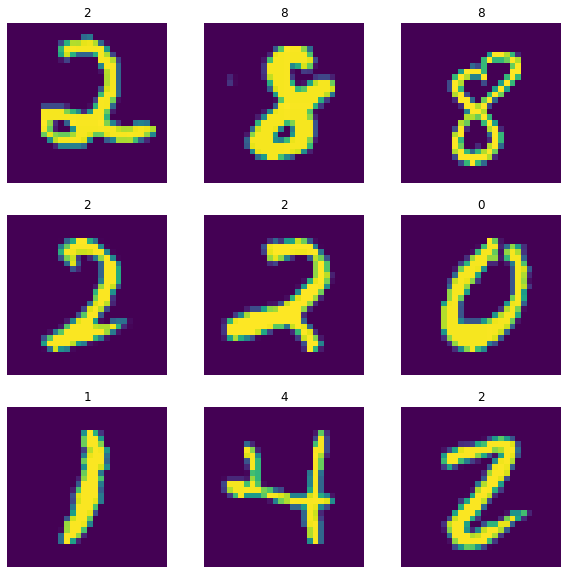

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image = np.squeeze(images[i])
    plt.imshow(image)
    plt.title(classes[labels[i]])
    plt.axis('off')

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


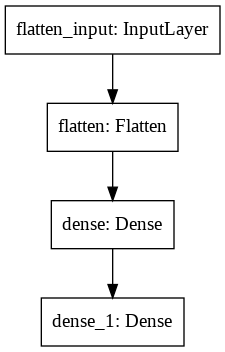

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    ds_train,
    validation_data = ds_test,
    epochs=7
)

Epoch 1/7
469/469 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.9021 - val_loss: 0.1940 - val_accuracy: 0.9457
Epoch 2/7
469/469 [==============================] - 1s 3ms/step - loss: 0.1683 - accuracy: 0.9526 - val_loss: 0.1426 - val_accuracy: 0.9575
Epoch 3/7
469/469 [==============================] - 1s 3ms/step - loss: 0.1225 - accuracy: 0.9655 - val_loss: 0.1178 - val_accuracy: 0.9646
Epoch 4/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0961 - accuracy: 0.9726 - val_loss: 0.1093 - val_accuracy: 0.9661
Epoch 5/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0782 - accuracy: 0.9781 - val_loss: 0.0905 - val_accuracy: 0.9729
Epoch 6/7
469/469 [==============================] - 2s 3ms/step - loss: 0.0639 - accuracy: 0.9817 - val_loss: 0.0817 - val_accuracy: 0.9755
Epoch 7/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0538 - accuracy: 0.9844 - val_loss: 0.0786 - val_accuracy: 0.9750


In [ ]:
for e in history.history:
  print(e)

loss
accuracy
val_loss
val_accuracy


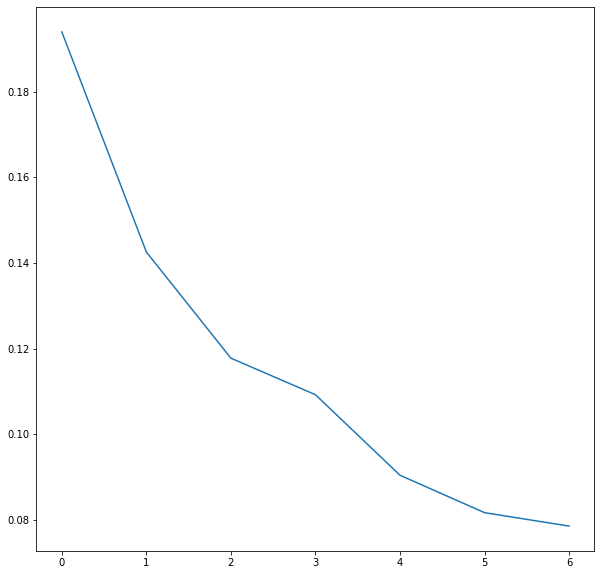

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(range(7), history.history['val_loss'])

In [ ]:
model.evaluate(ds_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.0786 - accuracy: 0.9750


[0.07861130684614182, 0.9750000238418579]

In [ ]:
pred = model.predict(ds_test)

pred = list(map(lambda x: np.argmax(x), pred))

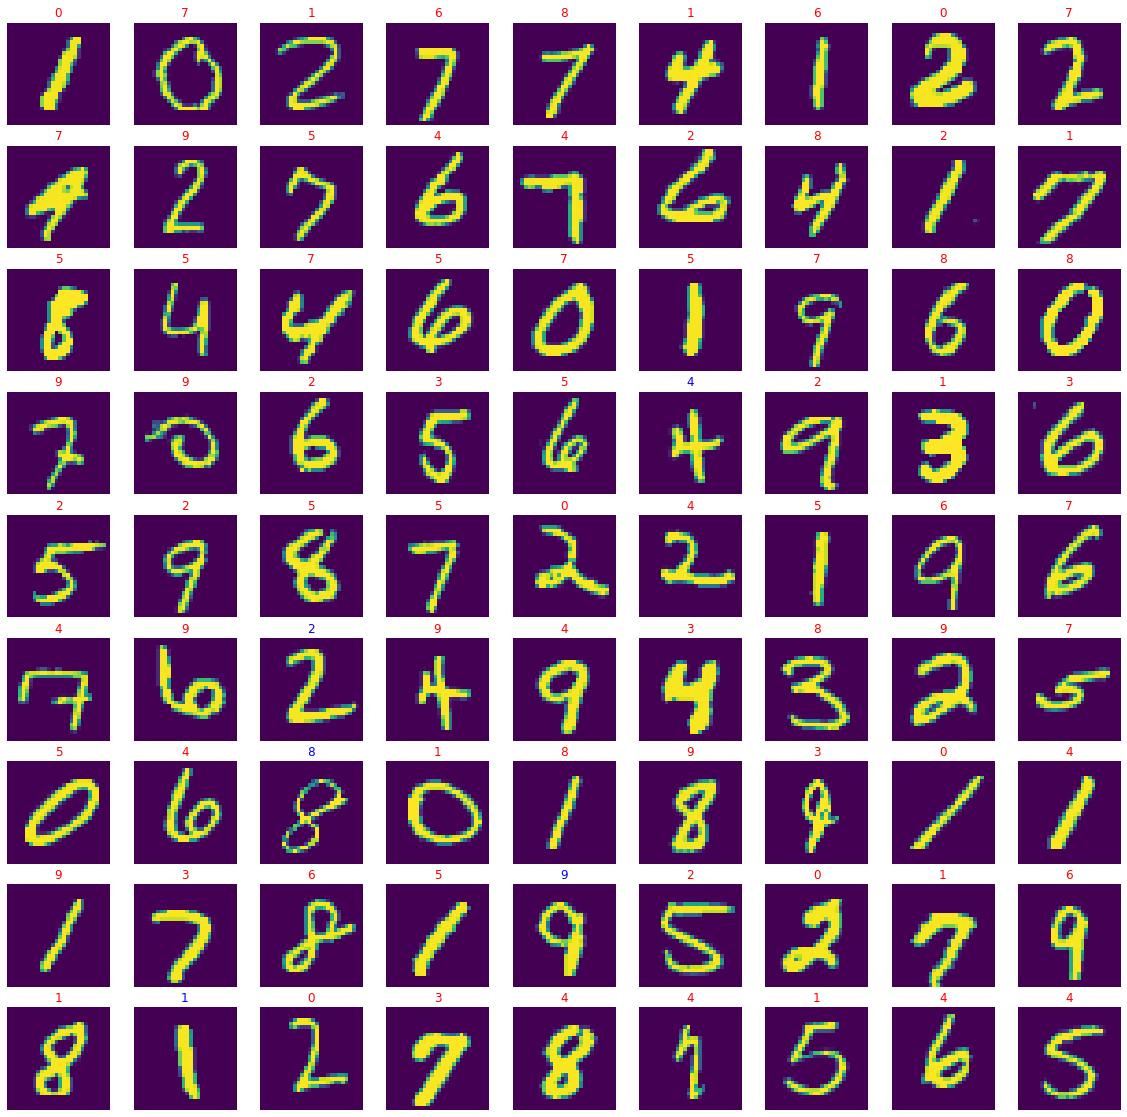

In [ ]:
plt.figure(figsize=(20, 20))

for images, labels in ds_test.take(1):
  for i in range(81):
    ax = plt.subplot(9, 9, i + 1)
    image = np.squeeze(images[i])
    plt.imshow(image)
    prediction = pred[i] == classes[labels[i]]
    plt.title(pred[i], color=('blue' if prediction else 'red'))
    plt.axis('off')